# Mean+Gaussian threshold 
A thresholding function returns an intensity value that can be used to separate foreground and background based on calculations done on the intensity bins.

 Mean thresholding derives the threshold value from the average intensity value of the kernel or image it is thresholding. 
 
Gaussian thresholding is used exclusively for adaptive or local thresholding. This methodology of thresholding uses a kernel system similar to Sobel. When thresholding a section of an image, gaussian finds the weighted sum of the kernel values to calculate a threshold instead of just the average.




Besides mean and Gaussian thresholding, there are various other types of thresholding algorithms with different approaches and characteristics.



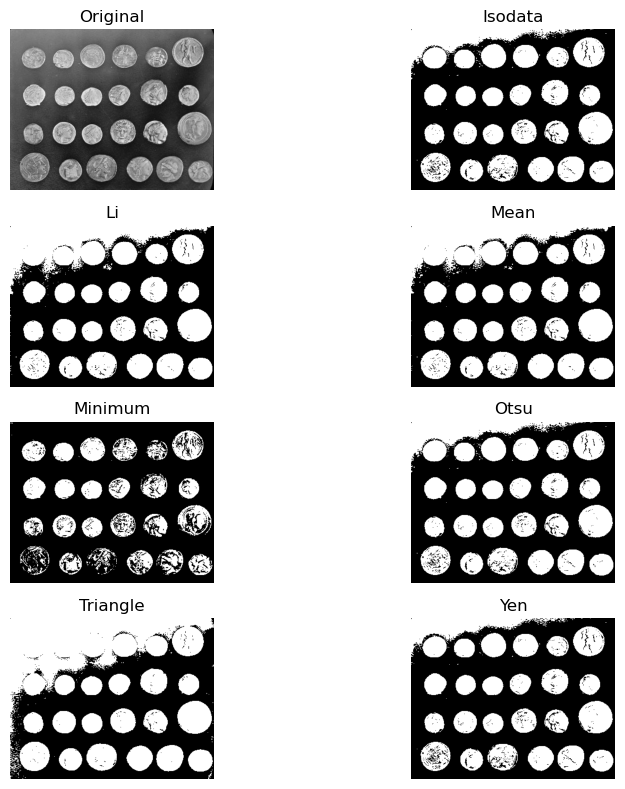

In [30]:
import cv2
import skimage
import skimage.io as io
import skimage.filters as filters
import skimage.color as color
from skimage.filters import try_all_threshold
import numpy as np
import matplotlib.pyplot as plt
img = skimage.data.coins()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
io.show()

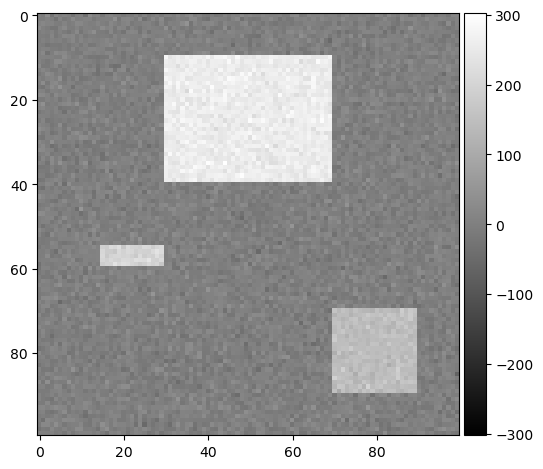

In [31]:


# Example image
image = np.zeros((100, 100))

# Squares
image[10:40, 30:70] = 255
image[55:60, 15:30] = 200
image[70:90, 70:90] = 145

# Add random noise
noise = np.random.normal(0, 15, size=(100, 100))
image += noise
io.imshow(image, cmap = 'gray')
io.show()

With this numpy array, you can see how mean and gaussian differ.

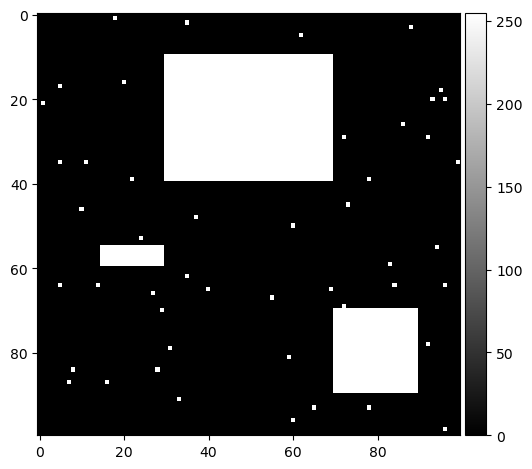

In [32]:
# Mean thresholding
mean_threshold = np.mean(image)
mean_thresholded = np.where(image > mean_threshold, 255, 0) #sets values of "image" that are greater than threshold to 255, if not, 0
io.imshow(mean_thresholded, cmap = 'gray')
io.show()

Since our image has a contrasting foreground and background it was easy for the mean threshold to preserve 2 out of the 3 blocks in the image. However, since one was dim in comparison to the rest, one square was excluded in the threshold. 


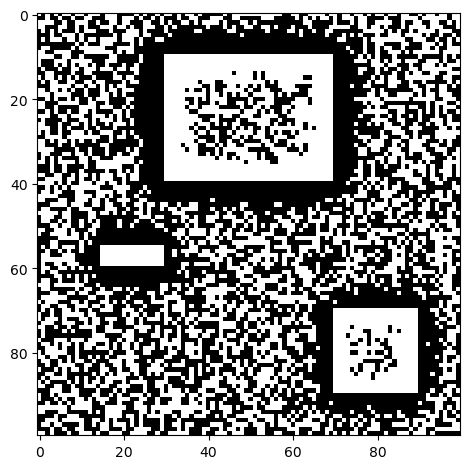

In [33]:
block_size = 21  # Size of the kernel 
gaussian_threshold = filters.threshold_local(image, block_size, method='gaussian', mode='reflect')

# Apply thresholding
binary_image = image > gaussian_threshold
normalized_binary = binary_image.astype(float) # Converts Bool to float 
normalized_binary /= normalized_binary.max()#normalized 
io.imshow(normalized_binary, cmap = 'gray')
io.show()

Due to the nature of gaussian, it is restricted to only being applied locally. With that in mind, the local gaussian threshold was able to find appropriate threshold values for all three of the squares, compensating for their level of intensity.


[1]	“Auto Threshold,” ImageJ Wiki. https://imagej.github.io/plugins/auto-threshold (accessed Jun. 27, 2023).
[2]	S. Van Der Walt et al., “scikit-image: image processing in Python,” PeerJ, vol. 2, p. e453, Jun. 2014, doi: 10.7717/peerj.453.
[3]	“Gaussian Blur.” https://www.w3.org/Talks/2012/0125-HTML-Tehran/Gaussian.xhtml (accessed Jun. 28, 2023).
[4]	“NumPy.” https://numpy.org/ (accessed Jun. 29, 2023).
[5]	“OpenCV: Image Thresholding.” https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html (accessed Jun. 29, 2023).

